In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 简单单隐藏层前馈神经网络

In [2]:
from pywander.datasets import load_mnist_train_data, load_mnist_test_data

train_data = load_mnist_train_data()
test_data = load_mnist_test_data()

In [3]:
train_data = list(train_data)
test_data = list(test_data)

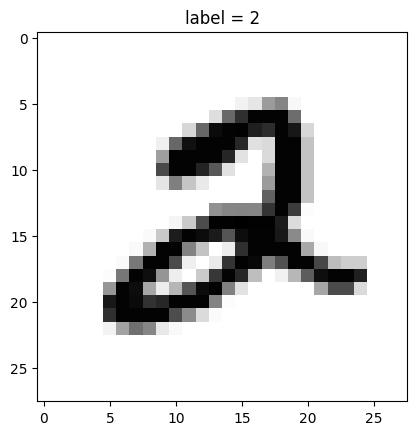

In [4]:
from pywander.datasets import plot_mnist_image
index = 5
plot_mnist_image(train_data[index][1], train_data[index][0])

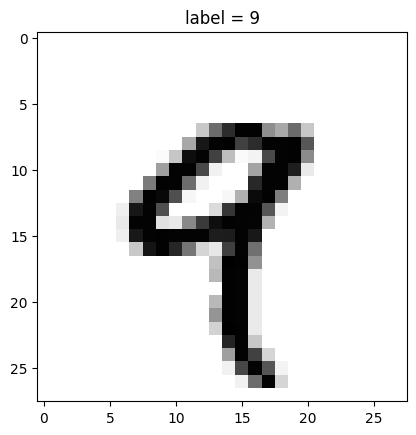

In [5]:
index = 4
plot_mnist_image(train_data[index][1], train_data[index][0])

In [6]:
from pywander.models import load_model
nn = load_model('mnist', 'simple_fnn.pkl')

score_card = []
for label, value in test_data:
    label = str(label)
    result_label = nn.query_label(value)

    if label == result_label:
        score_card.append(1)
    else:
        score_card.append(0)

score_card = np.asarray(score_card)
print(score_card.sum() / score_card.size)


0.9069


## 测试自己手写的图片

In [7]:
import imageio.v3 as iio
from pywander.datasets import get_datasets_path


test_png_path = get_datasets_path('mnist', 'self_create', '1.png')
im = iio.imread(test_png_path, mode='L')
label = nn.query_label(im.reshape(28 * 28))
print(label, '1')

test_png_path = get_datasets_path('mnist', 'self_create', '3.png')
im = iio.imread(test_png_path, mode='L')
label = nn.query_label(im.reshape(28 * 28))
print(label, '3')

test_png_path = get_datasets_path('mnist', 'self_create', '5.png')
im = iio.imread(test_png_path, mode='L')
label = nn.query_label(im.reshape(28 * 28))
print(label, '5')


6 1
3 3
6 5


## 向后查询

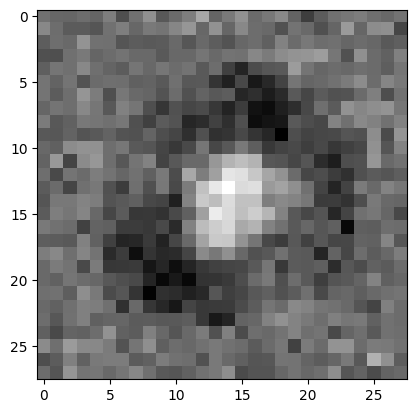

In [8]:
image_data = nn.back_query_label('0')
plt.imshow(image_data.reshape(28, 28), cmap='gray',vmin=0.01, vmax=0.99)


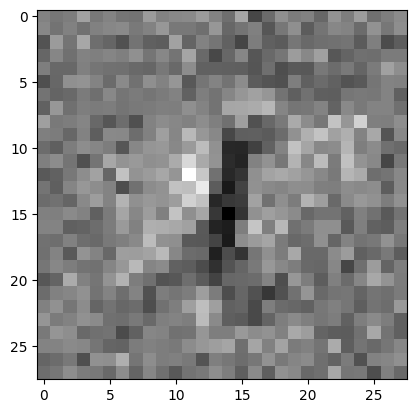

In [9]:
image_data = nn.back_query_label('1')
plt.imshow(image_data.reshape(28, 28), cmap='gray',vmin=0.01, vmax=0.99)